In [1]:
import pandas
import datetime
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
from davitpy.models import *
from davitpy import utils
from aacgmv2 import convert_mlt
%matplotlib inline

In [2]:
# We'll model peak potential as a log function of AsyH index.
def peak_pot_fit_func(asy):
    # parameters from fitting
    a_asy, b_asy = (-6.47, 9.48)
    peakPotVal = a_asy + b_asy*numpy.log(asy)    
    return peakPotVal

In [6]:
inpFname = "SuperDARNSapsDates.txt"
sapsDatesDF = pandas.read_csv(inpFname, delim_whitespace=True)
sapsDatesDF.head()

,date,start_time,end_time
0,20110205,230,330
1,20110302,100,230
2,20110310,545,615
3,20110312,15,45
4,20110403,400,600


In [35]:
# Asy Inds
asyDF = pandas.read_csv( "Asy_processed.txt", sep=' ' )
asyDF["date"] = pandas.to_datetime(asyDF["datetimeStr"], format='%Y%m%d-%H-%M')
asyDF["hour"] = asyDF["date"].apply(lambda x: x.strftime('%H'))
asyDF["minute"] = asyDF["date"].apply(lambda x: x.strftime('%M'))
asyDF["dtStr"] = asyDF["date"].apply(lambda x: x.strftime('%Y%m%d'))
selColsAsy = [ "AsyH", "date", "dtStr" ]
asyDF = asyDF[selColsAsy]

In [33]:
sapsDatesDF["date"] = sapsDatesDF["date"].astype(str)
sapsDatesDF["start_time"] = sapsDatesDF["start_time"].astype(str)
sapsDatesDF["start_time"] = [ x.zfill(4) for x in sapsDatesDF["start_time"] ]
sapsDatesDF["end_time"] = sapsDatesDF["end_time"].astype(str)
sapsDatesDF["end_time"] = [ x.zfill(4) for x in sapsDatesDF["end_time"] ]
sapsDatesDF["st_date"] = pandas.to_datetime( sapsDatesDF["date"] + "-" + sapsDatesDF["start_time"], format="%Y%m%d-%H%M" )
sapsDatesDF["end_date"] = pandas.to_datetime( sapsDatesDF["date"] + "-" + sapsDatesDF["end_time"], format="%Y%m%d-%H%M" )

In [54]:
datesList = []
medianAsyList = []
medianPotList = []
for row in sapsDatesDF.iterrows():
    subAsyDF = asyDF[ (asyDF["date"] >= row[1]["st_date"]) &\
                     (asyDF["date"] <= row[1]["end_date"]) ]
    asyMedVal = numpy.median( subAsyDF["AsyH"].values )
    potMedianVal = numpy.round( peak_pot_fit_func(asyMedVal) )
    datesList.append( row[1]["date"] )
    medianAsyList.append( asyMedVal )
    medianPotList.append( potMedianVal )
    
sapsPotDF = pandas.DataFrame({
            "date" : datesList,
            "median_asyh" : medianAsyList,
            "peak_potential_model" : medianPotList
            })
sapsPotDF.head()

,date,median_asyh,peak_potential_model
0,20110205,24.0,24.0
1,20110302,53.0,31.0
2,20110310,18.0,21.0
3,20110312,44.0,29.0
4,20110403,41.0,29.0


In [61]:
sapsPotDF.to_csv("saps-potentials-2013.csv", header=True,\
                    index=False, sep=' ' )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc1452e790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fcc144e01d0>]], dtype=object)

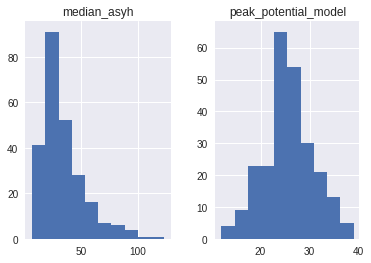

In [62]:
sapsPotDF.hist()

In [64]:
sapsDatesDF[ sapsDatesDF["date"] == "20110806"]

,date,start_time,end_time,st_date,end_date
34,20110806,0100,0400,2011-08-06 01:00:00,2011-08-06 04:00:00
